In [1]:
#help us create data structure that calls data frame work it can visulaize it like excel sheet and have individual coulmn and every coulmn ill hold database
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Heart.csv')
dataset.tail()# tail of the dataset
dataset.shape #shape of the data
dataset.size #size that holds i memory
dataset.count() # the count of each column
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

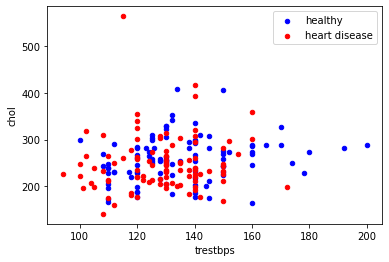

In [3]:
# filter the patient who have heart disease 
# heart disease is determined by 1 and the healthy patient is 0
healthy=dataset[dataset['target']==0][0:100]
heart_disease=dataset[dataset['target']==1][0:100]

# plot the healthy patinet with the number of blood pressure and cholestoral
axes=healthy.plot(kind='scatter',x="trestbps", y='chol',color='blue',label='healthy')

# plot the heart disease patinet with the number of blood pressure and cholestoral
heart_disease.plot(kind='scatter',x="trestbps", y='chol',color='red',label='heart disease',ax=axes)




In [4]:

#convert oldpeak cell from float to int
dataset['oldpeak']=dataset['oldpeak'].astype('int')
dataset.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int32
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [5]:
dataset.columns
#make feature that hold all cells except the target becase we want to make independend
#variable of the dataset to train it so we can make the prediction out of it
#dataset has 304 rows and 14 columns
#we picked only 13 column of them
feature=dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

#hold independent variable
x= np.asarray(feature)

#hold dependent variable
y=np.asarray(dataset['target'])

y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [6]:
# dataset will be the training part and test part
#train (x,y) x it self 2d array and y is 1d array
# dataset (304) celss train (80) cell and test (20)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=4)

#check how many rows and columns will take to test the model
# 242, 13
x_train.shape 

#242,1
y_train.shape

#61,13
x_test.shape

#61,1
y_test.shape

(61,)

In [7]:
from sklearn import svm
#kernel is function that helop to visualize the data drom diffrent prespective
#kernel function have diffrent types linear,polynomial, radial basis function,sigmoid
#gamma is kernel coefficient 

classifier=svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
from sklearn.metrics import  accuracy_score

print(accuracy_score(y_test, y_predict)*100)

85.24590163934425


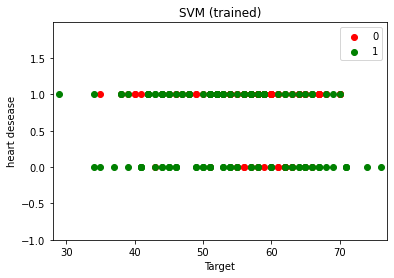

In [29]:
from matplotlib.colors import ListedColormap  

X_set, Y_set = x_train, y_train  


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T

pred = classifier.predict(Xpred).reshape(X1.shape)   
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('white', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (trained)')
plt.xlabel('Target')
plt.ylabel('heart desease')
plt.legend()
plt.show()

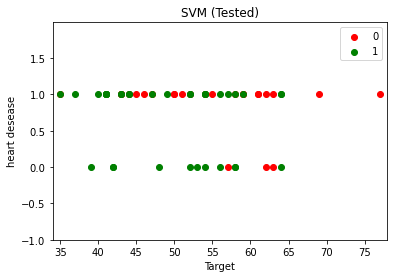

In [28]:
 
X_set, Y_set = x_test, y_test  

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T

pred = classifier.predict(Xpred).reshape(X1.shape)   
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('white', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Tested)')
plt.xlabel('Target')
plt.ylabel('heart desease')
plt.legend()
plt.show()